In [1]:
import torch
torch.cuda.current_device()
t

0

KeyboardInterrupt: 

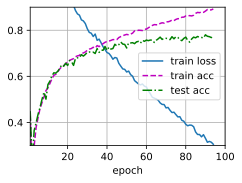

In [2]:
import sys     
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils import data
import my_utils as mu

# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Define the training and test sets
train_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define the dataloaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=512, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=512, shuffle=False)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the model
class Block(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(Block, self).__init__()
        
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        return out

class Backbone(nn.Module):
    def __init__(self, n_blocks, n_channels):
        super(Backbone, self).__init__()
        self.blocks = nn.ModuleList([nn.Sequential(
            Block(n_channels[i], n_channels[i+1]),
            Block(n_channels[i+1], n_channels[i+1])
        ) for i in range(n_blocks)])
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        
    def forward(self, x):
        for block in self.blocks:
            x = block(x)
        x = self.avgpool(x)
        return x
        
# class Classifier(nn.Module):
#     def __init__(self, n_classes, n_channels):
#         super(Classifier, self).__init__()
#         self.fc1 = nn.Linear(n_channels[-1], n_classes)

#     def forward(self, x):
#         x = x.view(x.size(0), -1)
#         x = self.fc1(x)
#         return x

class Classifier(nn.Module):
    def __init__(self, n_classes, n_channels):
        super(Classifier, self).__init__()
        self.dropout = nn.Dropout(p=0.01)
        self.fc1 = nn.Linear(n_channels[-1], n_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc1(x)
        return x
    
class Model(nn.Module):
    def __init__(self, n_blocks, n_channels, n_classes):
        super(Model, self).__init__()
        self.backbone = Backbone(n_blocks, n_channels)
        self.classifier = Classifier(n_classes, n_channels)
        
    def forward(self, x):
        x = self.backbone(x)
        x = self.classifier(x)
        return x

# Define the model parameters
n_blocks = 3
n_channels = [3, 32, 64, 128]
n_classes = 10

# __init__ialize the model
model = Model(n_blocks, n_channels, n_classes).to(device)

# Define the loss and optimizer
criterion = nn.CrossEntropyLoss()
l2_regularization_strength = 0.00001
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.0001, amsgrad=False)


from torchsummary import summary
num_epochs = 100
summary(model, (3,32,32));
# def updater(batch_size):
#     return optimizer.step()
mu.train_ch3(model, train_loader, test_loader, criterion, num_epochs, optimizer, device)





In [ ]:
# Define a function to train the model
def train(model, criterion, optimizer, train_loader, num_epochs):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs and labels
            inputs, labels = data

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass, backward pass, and optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Print statistics
            running_loss += loss.item()
            if i % 100 == 99:    # Print every 100 mini-batches
              print('[Epoch %d, Batch %d] Loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 100))
              running_loss = 0.0


In [5]:
mu.evaluate_accuracy(model, test_loader)




NameError: name 'mu' is not defined

In [6]:
mu.evaluate_accuracy(model, test_loader)


NameError: name 'mu' is not defined

In [7]:
import my_utils as mu
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils import data

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Define the training and test sets
train_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define the dataloaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

# Define the model
class Block(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(Block, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        return out

class Backbone(nn.Module):
    def __init__(self, n_blocks, n_channels):
        super(Backbone, self).__init__()
        self.blocks = nn.ModuleList([nn.Sequential(
            Block(n_channels[i], n_channels[i+1]),
            Block(n_channels[i+1], n_channels[i+1])
        ) for i in range(n_blocks)])
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        
    def forward(self, x):
        for block in self.blocks:
            x = block(x)
        x = self.avgpool(x)
        return x
        
class Classifier(nn.Module):
    def __init__(self, n_classes, n_channels):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(n_channels[-1], n_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

class Model(nn.Module):
    def __init__(self, n_blocks, n_channels, n_classes):
        super(Model, self).__init__()
        self.backbone = Backbone(n_blocks, n_channels)
        self.classifier = Classifier(n_classes, n_channels)
        
    def forward(self, x):
        x = self.backbone(x)
        x = self.classifier(x)
        return x

# Define the model parameters
n_blocks = 3
n_channels = [3, 32, 64, 128]
n_classes = 10

# Initialize the model
model = Model(n_blocks, n_channels, n_classes).to(device)

# Define the loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the number of epochs
num_epochs = 50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Train the model
mu.train_ch3(model, train_loader, test_loader, criterion, num_epochs, optimizer,device)

#Evaluate the model on the test set
test_acc = mu.evaluate_accuracy(model, test_loader)

print("Final test accuracy:", test_acc)

ModuleNotFoundError: No module named 'my_utils'

In [8]:
test_acc = mu.evaluate_accuracy(model, test_loader)

NameError: name 'mu' is not defined